In [1]:
import torch
import numpy as np
import cv2
from PIL import Image
from scipy.signal import convolve

In [2]:
a = torch.nn.Parameter(torch.tensor(2.))
b = torch.tensor(3.)
c = a * b
d = torch.nn.Parameter(torch.tensor(4.))
e = c * d
# e.requires_grad_(False)
e.detach_()
f = c * d
# f.detach_()
g = torch.nn.Parameter(torch.tensor(5.))
g.requires_grad_(False)
h = f * g
i = e + h

print(f"a data = {a.data,a.requires_grad}, grad = {a.grad}")
print(f"b data = {b.data,b.requires_grad}, grad = {b.grad}")
print(f"c data = {c.data,c.requires_grad}, grad = {c.grad}")
print(f"d data = {d.data,d.requires_grad}, grad = {d.grad}")
print(f"e data = {e.data,e.requires_grad}, grad = {e.grad}")
print(f"f data = {f.data,f.requires_grad}, grad = {f.grad}")
print(f"g data = {g.data,g.requires_grad}, grad = {g.grad}")
print(f"h data = {h.data,h.requires_grad}, grad = {h.grad}")
print(f"i data = {i.data,i.requires_grad}, grad = {i.grad}")

h.retain_grad()
i.backward()

print(f"a data = {a.data,a.requires_grad}, grad = {a.grad}")
print(f"b data = {b.data,b.requires_grad}, grad = {b.grad}")
print(f"c data = {c.data,c.requires_grad}, grad = {c.grad}")
print(f"d data = {d.data,d.requires_grad}, grad = {d.grad}")
print(f"e data = {e.data,e.requires_grad}, grad = {e.grad}")
print(f"f data = {f.data,f.requires_grad}, grad = {f.grad}")
print(f"g data = {g.data,g.requires_grad}, grad = {g.grad}")
print(f"h data = {h.data,h.requires_grad}, grad = {h.grad}")
print(f"i data = {i.data,i.requires_grad}, grad = {i.grad}")

a data = (tensor(2.), True), grad = None
b data = (tensor(3.), False), grad = None
c data = (tensor(6.), True), grad = None
d data = (tensor(4.), True), grad = None
e data = (tensor(24.), False), grad = None
f data = (tensor(24.), True), grad = None
g data = (tensor(5.), False), grad = None
h data = (tensor(120.), True), grad = None
i data = (tensor(144.), True), grad = None
a data = (tensor(2.), True), grad = 60.0
b data = (tensor(3.), False), grad = None
c data = (tensor(6.), True), grad = None
d data = (tensor(4.), True), grad = 30.0
e data = (tensor(24.), False), grad = None
f data = (tensor(24.), True), grad = None
g data = (tensor(5.), False), grad = None
h data = (tensor(120.), True), grad = 1.0
i data = (tensor(144.), True), grad = None


/var/folders/jb/g3ylc11574sd3g6w3t57g5rm0000gn/T/ipykernel_984/601989472.py:17: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1662188943573/work/build/aten/src/ATen/core/TensorBody.h:483.)
  print(f"c data = {c.data,c.requires_grad}, grad = {c.grad}")
/var/folders/jb/g3ylc11574sd3g6w3t57g5rm0000gn/T/ipykernel_984/601989472.py:20: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populate

In [81]:
a = cv2.resize(cv2.imread("/Users/WangHao/Desktop/1.png")[..., 0], (500, 500))
b = cv2.resize(cv2.imread("/Users/WangHao/Desktop/2.png")[..., 0], (500, 500))
c = cv2.resize(cv2.imread("/Users/WangHao/Desktop/3.png")[..., 0], (500, 500))
d = np.stack([a, b, c], axis=0)

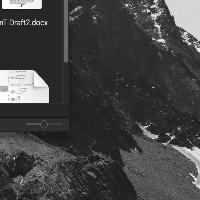

In [77]:
Image.fromarray(d[0])

In [82]:
e = np.array(np.pad(np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
                    ((249, 248), (249, 248)),
                    'constant',
                    constant_values=(0, 0)),
             dtype=np.uint8)
f = np.stack([e, e, e], axis=0)

In [63]:
e[100, 100]

127

In [91]:
%%timeit
g = np.abs(np.fft.ifftshift(np.fft.ifft2(np.fft.fft2(d) * np.fft.fft2(f)), axes=[-2, -1]))

32.4 ms ± 1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [92]:
%%timeit
h = []
for idx in range(3):
    h.append(convolve(d[idx], f[idx], 'same'))

62.2 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


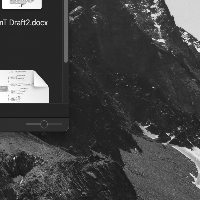

In [76]:
Image.fromarray(np.array(g[0], dtype=np.uint8))

In [6]:
a = cv2.resize(cv2.imread("/Users/WangHao/Desktop/1.png")[..., 0], (20, 20))

In [7]:
b = np.abs(np.fft.fft2(a))